In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as sps
from scipy.optimize import curve_fit
from numpy import exp



In [119]:
from google.colab import files
files.upload()

Saving candy-data.csv to candy-data (2).csv


{'candy-data.csv': b'\xef\xbb\xbfcompetitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y\r\n100 Grand,1,0,1,0,0,1,0,1,0,0.73199999,0.86000001,66.971725,1\r\n3 Musketeers,1,0,0,0,1,0,0,1,0,0.60399997,0.51099998,67.602936,1\r\nOne dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0\r\nOne quarter,0,0,0,0,0,0,0,0,0,0.011,0.51099998,46.116505,0\r\nAir Heads,0,1,0,0,0,0,0,0,0,0.90600002,0.51099998,52.341465,1\r\nAlmond Joy,1,0,0,1,0,0,0,1,0,0.465,0.76700002,50.347546,1\r\nBaby Ruth,1,0,1,1,1,0,0,1,0,0.60399997,0.76700002,56.914547,1\r\nBoston Baked Beans,0,0,0,1,0,0,0,0,1,0.31299999,0.51099998,23.417824,0\r\nCandy Corn,0,0,0,0,0,0,0,0,1,0.90600002,0.32499999,38.010963,0\r\nCaramel Apple Pops,0,1,1,0,0,0,0,0,0,0.60399997,0.32499999,34.517681,0\r\nCharleston Chew,1,0,0,0,1,0,0,1,0,0.60399997,0.51099998,38.975037,0\r\nChewey Lemonhead Fruit Mix,0,1,0,0,0,0,0,0,1,0.73199999,0.51099998,36.017628,0\r\nChiclets,0,1,0,0,0,0,

In [120]:
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')


In [121]:
DATA

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1


In [123]:
train_data = DATA.drop(['Almond Joy','Dum Dums','Mr Good Bar'])

X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))


In [124]:
y = pd.DataFrame(train_data['Y'])


In [125]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())


In [99]:
files.upload()

Saving candy-test.csv to candy-test (1).csv


{'candy-test.csv': b'\xef\xbb\xbfcompetitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y\r\nSugar Babies,0,1,1,0,0,0,1,0,1,0.6473643,0.76700002,0\r\nSugar Daddy,1,0,0,0,1,0,1,0,0,0.41800001,0.32499999,0\r\nSuper Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,0\r\nSwedish Fish,0,1,0,0,0,0,0,0,1,0.60399997,0.755,1\r\nTootsie Pop,1,0,0,0,0,0,0,0,0,0.87656,0.5654,1\r\nTootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.31299999,0.51099998,0\r\nTootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17399999,0.011,0\r\nTootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465,0.32499999,1\r\nTrolli Sour Bites,0,1,0,0,0,0,0,0,1,0.31299999,0.255,0\r\nTwix,0,1,0,0,0,0,0,0,0,0.73543,0.86634,1\r\nTwizzlers,0,1,0,0,0,0,0,0,0,0.22,0.116,0\r\nWarheads,0,1,0,0,0,0,1,0,0,0.093000002,0.116,0\r\nWelchs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.31299999,0.31299999,0\r\nWerthers Original Caramel,1,0,1,0,0,0,1,0,0,0.186,0.26699999,0\r\nWhoppers,1,0,0,0,0,0,0,0,1,0.87199998,0.84799999,1'}

In [126]:
test_data = pd.read_csv("candy-test.csv", delimiter=',', index_col='competitorname')
test_data

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
competitorname,,,,,,,,,,,,
Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0
Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0
Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0
Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1
Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1
Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0
Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0
Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1
Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0


In [127]:
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))


In [128]:
Y_pred = reg.predict(X_test)


In [129]:
Y_pred


array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [130]:
Y_pred_probs = reg.predict_proba(X_test)
Y_pred_probs


array([[0.70808289, 0.29191711],
       [0.61618911, 0.38381089],
       [0.64919448, 0.35080552],
       [0.62002666, 0.37997334],
       [0.24606995, 0.75393005],
       [0.3162222 , 0.6837778 ],
       [0.33443847, 0.66556153],
       [0.23218423, 0.76781577],
       [0.64658373, 0.35341627],
       [0.58842161, 0.41157839],
       [0.64080422, 0.35919578],
       [0.84366164, 0.15633836],
       [0.64842267, 0.35157733],
       [0.42490124, 0.57509876],
       [0.26641301, 0.73358699]])

In [131]:
Y_pred_probs_class_1 = Y_pred_probs[:, 1]
Y_pred_probs_class_1


array([0.29191711, 0.38381089, 0.35080552, 0.37997334, 0.75393005,
       0.6837778 , 0.66556153, 0.76781577, 0.35341627, 0.41157839,
       0.35919578, 0.15633836, 0.35157733, 0.57509876, 0.73358699])

In [132]:
Y_true = (test_data['Y'].to_frame().T).values.ravel()
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [133]:
from sklearn import metrics


In [134]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)


0.86

In [135]:
metrics.recall_score(Y_true, Y_pred)


0.6

In [136]:
metrics.precision_score(Y_true, Y_pred)


0.5

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


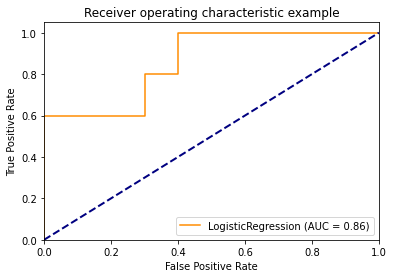

In [138]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [139]:
reg.predict_proba([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0.093000	, 0.11600]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.84366164, 0.15633836]])